In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import dash_bootstrap_components as dbc

# Load and preprocess data
df = pd.read_excel('Online Retail.xlsx')

In [2]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Data Preparation

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# Data cleaning
df = df.dropna(subset=['CustomerID', 'Description'])

In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

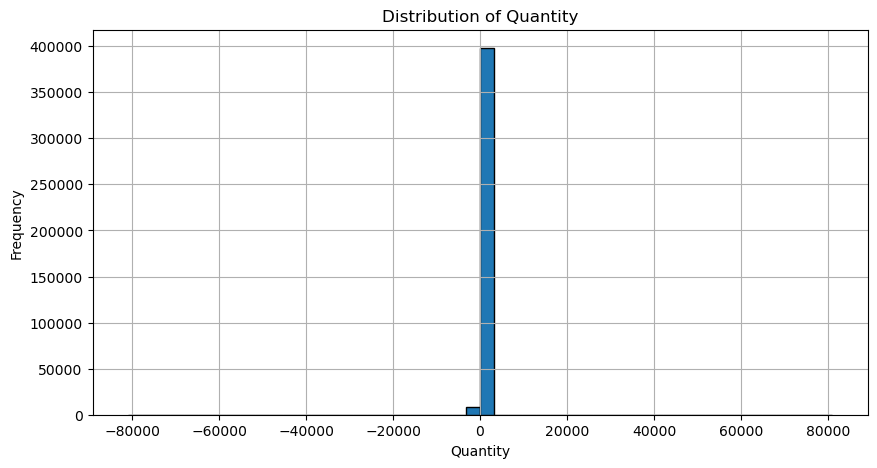

In [6]:
# Analysis of Quantity
plt.figure(figsize=(10, 5))
plt.hist(df['Quantity'], bins=50, edgecolor='k')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
# Checking for negative quantities
negative_quantity_count = df[df['Quantity'] < 0].shape[0]
print(f"Number of transactions with negative quantities: {negative_quantity_count}")

Number of transactions with negative quantities: 8905


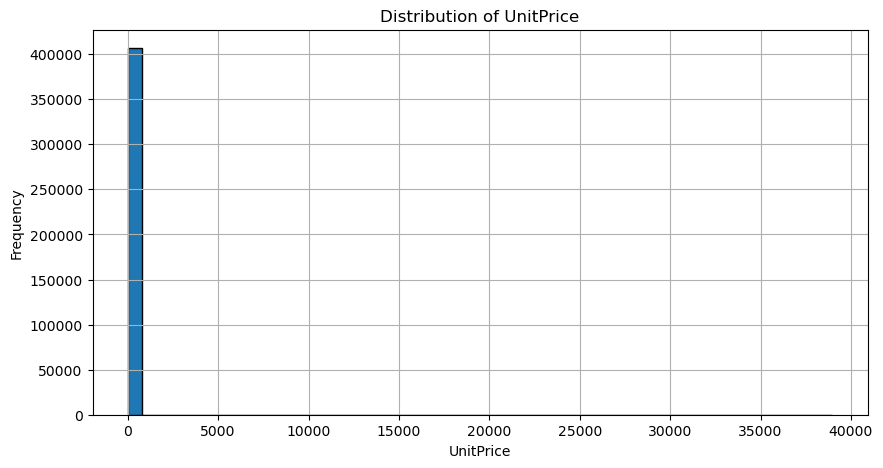

In [8]:
# Analysis of UnitPrice and TotalPrice necessity
plt.figure(figsize=(10, 5))
plt.hist(df['UnitPrice'], bins=50, edgecolor='k')
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

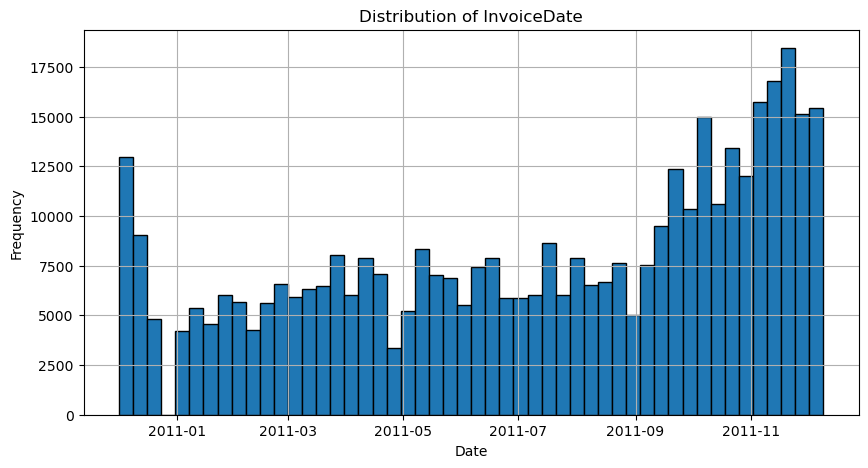

In [9]:
# Overview of InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime
plt.figure(figsize=(10, 5))
plt.hist(df['InvoiceDate'], bins=50, edgecolor='k')
plt.title('Distribution of InvoiceDate')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
# Checking for date range and anomalies
date_range = df['InvoiceDate'].agg(['min', 'max'])
print(f"Date range in the dataset: {date_range['min']} to {date_range['max']}")
print(f"Number of unique days: {df['InvoiceDate'].nunique()}")

Date range in the dataset: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Number of unique days: 20460


In [11]:
# Feature engineering
df = df[df['Quantity'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Day'] = df['InvoiceDate'].dt.day

# EDA

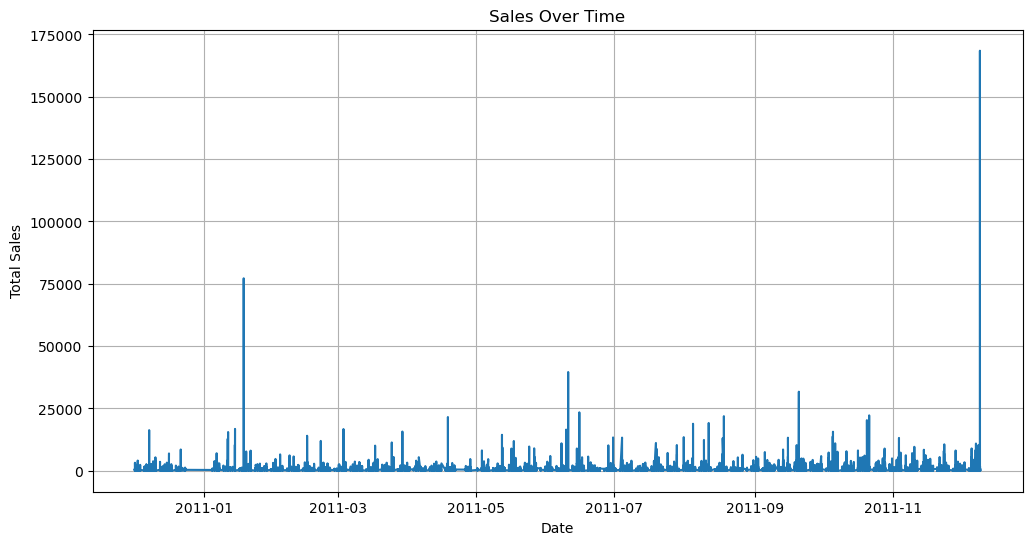

In [12]:
# Sales Over Time
sales_over_time = df.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['InvoiceDate'], sales_over_time['TotalPrice'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

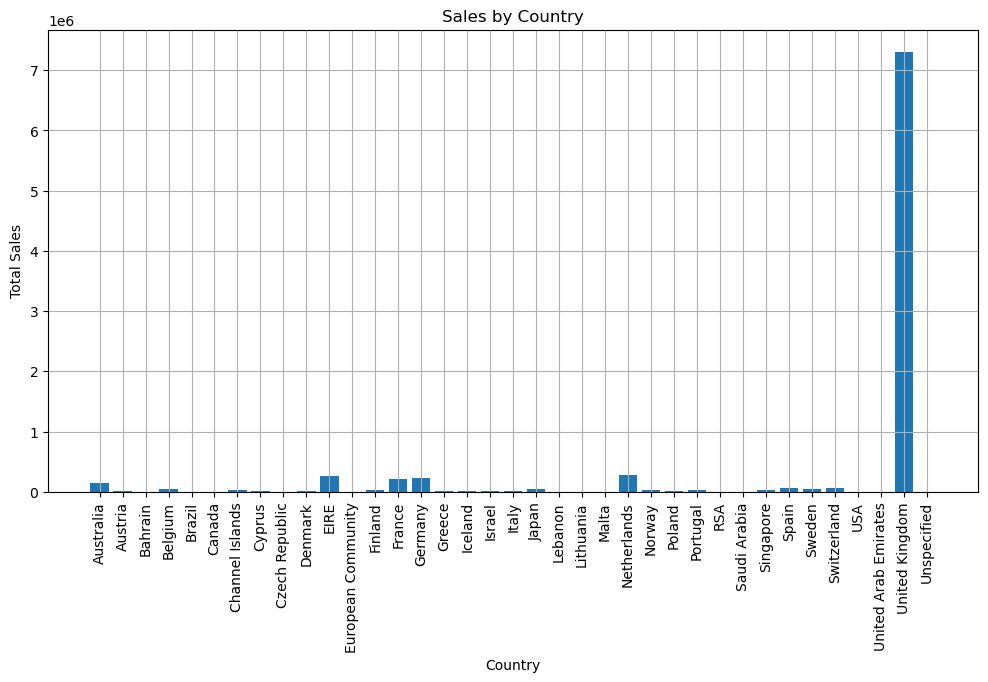

In [13]:
# Sales by Country
sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(sales_by_country['Country'], sales_by_country['TotalPrice'])
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

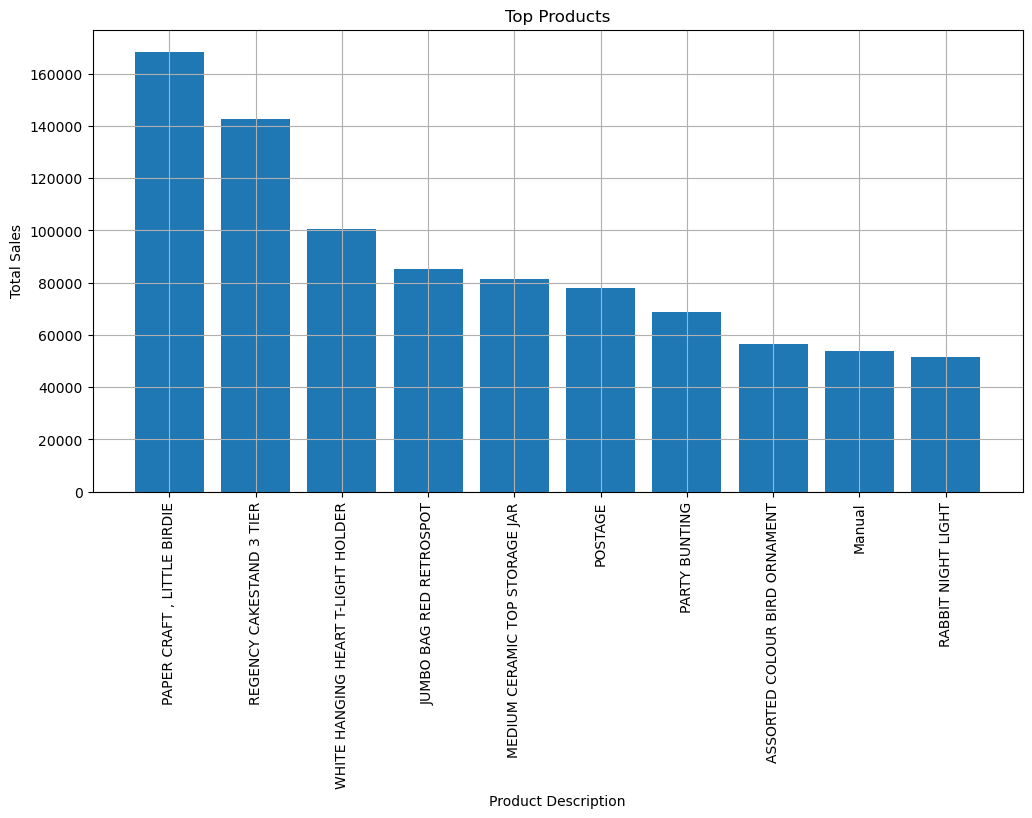

In [14]:
# Top Products
top_products = df.groupby('Description')['TotalPrice'].sum().reset_index().nlargest(10, 'TotalPrice')
plt.figure(figsize=(12, 6))
plt.bar(top_products['Description'], top_products['TotalPrice'])
plt.title('Top Products')
plt.xlabel('Product Description')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

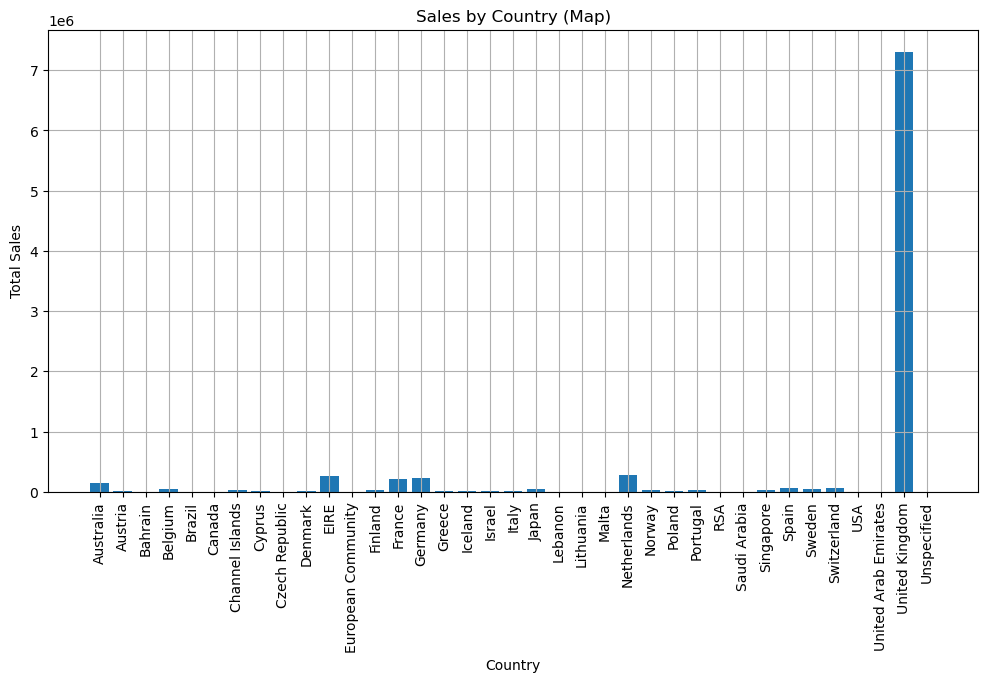

In [15]:
# Sales Map (using a simple bar chart for countries as a placeholder for choropleth map)
sales_map = df.groupby('Country')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(sales_map['Country'], sales_map['TotalPrice'])
plt.title('Sales by Country (Map)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

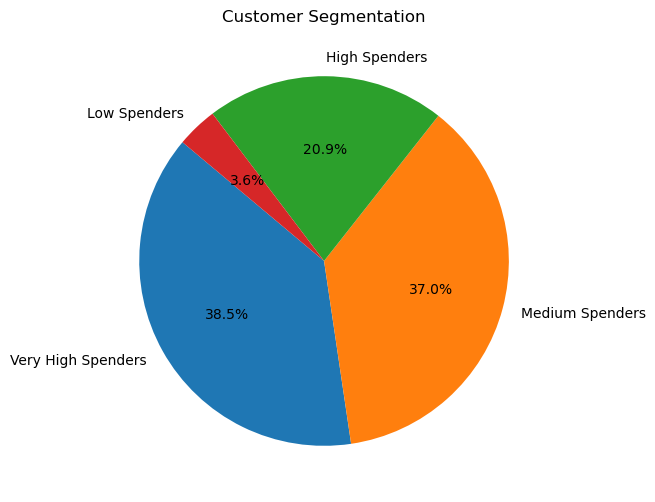

In [16]:
# Customer Segmentation
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_spending['Segment'] = pd.cut(customer_spending['TotalPrice'], 
                                      bins=[0, 100, 500, 1000, float('Inf')],
                                      labels=['Low Spenders', 'Medium Spenders', 'High Spenders', 'Very High Spenders'])
segment_count = customer_spending['Segment'].value_counts().reset_index()
segment_count.columns = ['Segment', 'Count']
plt.figure(figsize=(12, 6))
plt.pie(segment_count['Count'], labels=segment_count['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Customer Segmentation')
plt.show()

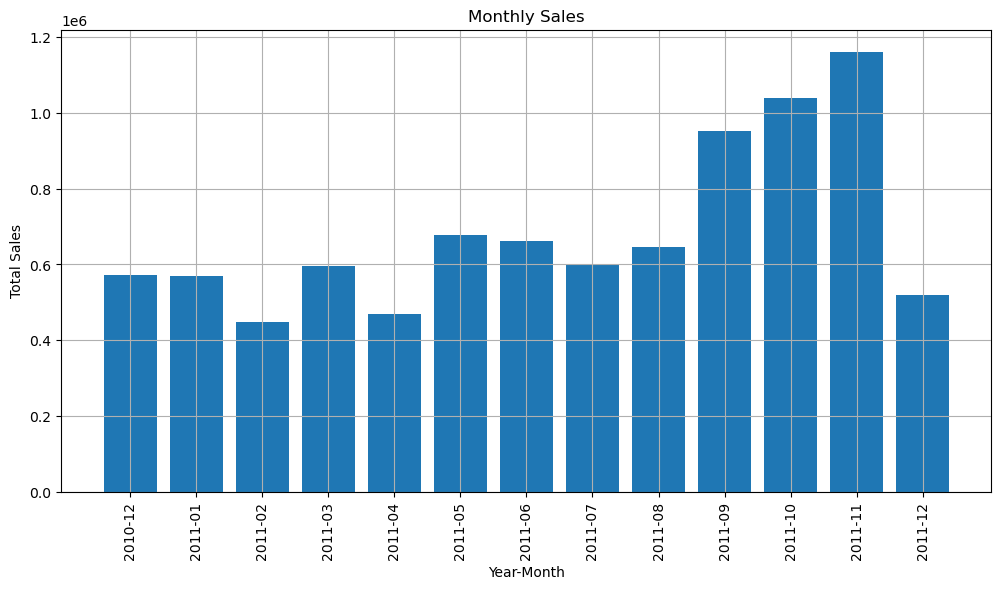

In [17]:
# Monthly Sales
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['YearMonth'], monthly_sales['TotalPrice'])
plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Dashboard

In [18]:
# Initialize Dash app with Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Get unique YearMonth
unique_year_months = df['YearMonth'].sort_values().unique()
date_marks = {i: date for i, date in enumerate(unique_year_months)}

colors = {
    'background': '#111111',
    'text': '#0000FF'  # Changed title color to blue
}

# Layout
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
   html.H1("Sales Dashboard", style={'text-align': 'center'}),
    
    # Information Text
    html.Div([
        html.P("Welcome to the Sales Dashboard. This interactive tool allows you to explore and analyze customer spending patterns and monthly sales performance."),
        html.P("Use the date slider below to filter data by specific time periods and view customer segmentation based on total spending. You can also track sales trends over time with the monthly sales bar chart.")
    ], style={'text-align': 'center', 'padding': '10px'}),
    html.Div([
        dcc.RangeSlider(
            id='date-slider',
            min=0,
            max=len(unique_year_months) - 1,
            value=[0, len(unique_year_months) - 1],
            marks=date_marks,
            className='mb-4'
        )
    ], style={'padding': '10px 5px'}),

    html.Div([
        dcc.Graph(id='sales-over-time')
    ], style={'width': '49%', 'display': 'inline-block'}),

    html.Div([
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in df['Country'].unique()],
            value=['United Kingdom'],
            multi=True,
            className='mb-4'
        ),
        dcc.Graph(id='sales-by-country')
    ], style={'width': '49%', 'display': 'inline-block', 'vertical-align': 'top'}),

    html.Div([
        dcc.Graph(id='top-products')
    ], style={'width': '49%', 'display': 'inline-block'}),

    html.Div([
        dcc.Graph(id='sales-map')
    ], style={'width': '49%', 'display': 'inline-block'}),
    
    html.Div([
        dcc.Graph(id='customer-segmentation')
    ], style={'width': '49%', 'display': 'inline-block'}),

    html.Div([
        dcc.Graph(id='monthly-sales')
    ], style={'width': '49%', 'display': 'inline-block'})
])

# Callbacks
@app.callback(
    Output('sales-over-time', 'figure'),
    Input('date-slider', 'value')
)
def update_sales_over_time(date_range):
    start_date = unique_year_months[date_range[0]]
    end_date = unique_year_months[date_range[1]]
    filtered_df = df[(df['YearMonth'] >= start_date) & (df['YearMonth'] <= end_date)]
    sales_over_time = filtered_df.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()
    fig = px.line(sales_over_time, x='InvoiceDate', y='TotalPrice', title='Sales Over Time')
    fig.update_layout(template='plotly_dark')
    return fig

@app.callback(
    Output('sales-by-country', 'figure'),
    Input('country-dropdown', 'value')
)
def update_sales_by_country(selected_countries):
    if isinstance(selected_countries, str):
        selected_countries = [selected_countries]
    filtered_df = df[df['Country'].isin(selected_countries)]
    sales_by_country = filtered_df.groupby('Country')['TotalPrice'].sum().reset_index()
    fig = px.bar(sales_by_country, x='Country', y='TotalPrice', title='Sales by Country')
    fig.update_layout(template='plotly_dark')
    return fig

@app.callback(
    Output('top-products', 'figure'),
    Input('date-slider', 'value')
)
def update_top_products(date_range):
    start_date = unique_year_months[date_range[0]]
    end_date = unique_year_months[date_range[1]]
    filtered_df = df[(df['YearMonth'] >= start_date) & (df['YearMonth'] <= end_date)]
    top_products = filtered_df.groupby('Description')['TotalPrice'].sum().reset_index().nlargest(10, 'TotalPrice')
    fig = px.bar(top_products, x='Description', y='TotalPrice', title='Top Products')
    fig.update_layout(template='plotly_dark')
    return fig

@app.callback(
    Output('sales-map', 'figure'),
    Input('date-slider', 'value')
)
def update_sales_map(date_range):
    start_date = unique_year_months[date_range[0]]
    end_date = unique_year_months[date_range[1]]
    filtered_df = df[(df['YearMonth'] >= start_date) & (df['YearMonth'] <= end_date)]
    sales_by_country = filtered_df.groupby('Country')['TotalPrice'].sum().reset_index()
    fig = px.choropleth(sales_by_country, locations='Country', locationmode='country names', color='TotalPrice',
                        title='Sales by Country', template='plotly_dark')
    return fig

@app.callback(
    Output('customer-segmentation', 'figure'),
    Input('date-slider', 'value')
)
def update_customer_segmentation(date_range):
    start_date = unique_year_months[date_range[0]]
    end_date = unique_year_months[date_range[1]]
    filtered_df = df[(df['YearMonth'] >= start_date) & (df['YearMonth'] <= end_date)]
    customer_spending = filtered_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
    customer_spending['Segment'] = pd.cut(customer_spending['TotalPrice'], 
                                          bins=[0, 100, 500, 1000, float('Inf')],
                                          labels=['Low Spenders', 'Medium Spenders', 'High Spenders', 'Very High Spenders'])
    segment_count = customer_spending['Segment'].value_counts().reset_index()
    segment_count.columns = ['Segment', 'Count']
    fig = px.pie(segment_count, values='Count', names='Segment', title='Customer Segmentation')
    fig.update_layout(template='plotly_dark')
    return fig

@app.callback(
    Output('monthly-sales', 'figure'),
    Input('date-slider', 'value')
)
def update_monthly_sales(date_range):
    start_date = unique_year_months[date_range[0]]
    end_date = unique_year_months[date_range[1]]
    filtered_df = df[(df['YearMonth'] >= start_date) & (df['YearMonth'] <= end_date)]
    monthly_sales = filtered_df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
    fig = px.bar(monthly_sales, x='YearMonth', y='TotalPrice', title='Monthly Sales')
    fig.update_layout(template='plotly_dark')
    return fig

if __name__ == '__main__':

    app.run_server(port=8063, mode='inline')